<a href="https://colab.research.google.com/github/ChanhyeongJo/FinopsysProject/blob/main/%EC%B9%B4%EB%93%9C%EC%A0%95%EB%B3%B4%ED%9A%8C%EC%9B%90%20%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%201_%EC%A1%B0%EC%B0%AC%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# library import
import numpy as np
import pandas as pd
import glob

# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager

#font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
#font_family = font_manager.FontProperties(fname=font_fname).get_name()
#plt.rcParams['font.family'] = font_family
!pip install kmodes
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.utils import resample

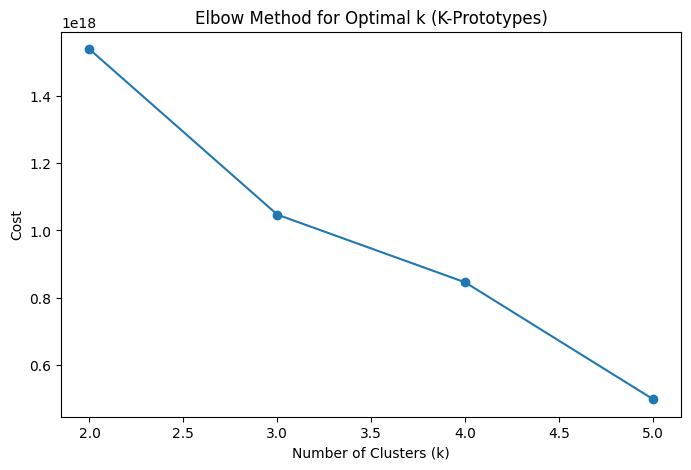

In [4]:
cluster_data= pd.read_csv('범주형클러스터링_회원정보.csv')

# 범주형 컬럼만 선택
categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

# 범주형 컬럼의 인덱스 얻기
categorical_columns_indices = [cluster_data.columns.get_loc(col) for col in categorical_columns]
#print(categorical_columns_indices)

# 데이터의 10%를 샘플링
sampled_data = resample(cluster_data, n_samples=int(len(cluster_data) * 0.1), random_state=42)

# 클러스터 개수와 비용 저장
costs = []
k_values = range(2, 6)  # 클러스터 개수를 2부터 6까지 시도

# K-Prototypes 실행
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', n_init=2, random_state=42)
    kproto.fit(sampled_data, categorical=categorical_columns_indices)  # 범주형 컬럼 전달
    costs.append(kproto.cost_)

# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k (K-Prototypes)')
plt.show()


In [6]:
cluster_data.head()

,정규화_부유도,Life_Stage,VIP등급코드,1순위업종,2순위업종,3순위업종,기준년월,연령,회원여부_이용가능,회원여부_이용가능_CA,...,최종카드발급경과월,총이용금액,총유효카드수,총연회비,연체비율,부유도_지표,이용금액_신판_B0M,이용금액_신판_R3M,이용금액_신판_R6M,이용금액_신판_R12M
0,2.176212,5,7.0,납부,쇼핑,일상생활,201812,40.0,1,1,...,27.0,-90838.0,2.0,0.0,-0.0,-36330.75,107903.0,318059.0,718343.0,3262344.0
1,2.413563,4,Missing,납부,쇼핑,교통,201812,30.0,1,1,...,23.0,1417978.0,1.0,0.0,0.0,567194.50,243960.0,786755.0,1655640.0,5604157.0
2,2.289359,4,Missing,Missing,Missing,Missing,201812,40.0,1,1,...,10.0,628424.0,1.0,0.0,0.0,251373.90,273763.0,273763.0,273763.0,757181.0
3,2.243714,4,Missing,교통,Missing,Missing,201812,40.0,1,1,...,48.0,338262.0,3.0,0.0,0.0,135309.40,48942.0,146868.0,268087.0,468022.0
4,2.190502,5,Missing,Missing,Missing,Missing,201812,40.0,0,0,...,22.0,0.0,1.0,0.0,0.0,4.30,0.0,0.0,0.0,673648.0


In [9]:
# 수치형과 범주형 컬럼 구분
numeric_columns = ['정규화_부유도']
categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

# 범주형 컬럼 인덱스
categorical_columns_indices = [sampled_data.columns.get_loc(col) for col in categorical_columns]


# 수치형 데이터
data_numeric = sampled_data[numeric_columns].values

# 범주형 데이터의 인덱스 구하기
categorical_columns_indices = [sampled_data.columns.get_loc(col) for col in categorical_columns]

AttributeError: 'list' object has no attribute 'head'

In [8]:
# K-Prototypes 실행
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)
clusters = kproto.fit_predict(sampled_data.values, categorical=categorical_columns_indices)

# 클러스터 결과를 데이터프레임에 추가
sampled_data['Cluster'] = clusters

In [13]:
# 클러스터 결과를 포함한 데이터프레임을 CSV로 저장
sampled_data.to_csv('sampled_data_with_clusters.csv', index=False, encoding='utf-8-sig')

print("CSV 파일로 저장되었습니다: sampled_data_with_clusters.csv")

CSV 파일로 저장되었습니다: sampled_data_with_clusters.csv


In [14]:
from google.colab import files

# 파일 다운로드
files.download('sampled_data_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>